In [90]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

Read the CSV and Perform Basic Data Cleaning

In [22]:
df = pd.read_csv(r'C:\Users\earth\Desktop\class_folder\FinalProject\Resources\final_table_with_conditional.csv')
df.head()


,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks,Price_Status
0,2022-06,2022,Cherokee,362500.0,271.0,38.0,148.0,8.0,76.0,1904.0,407510.0,467.0,NaN,5.52,NaN,-0.052164,2.0,down
1,2022-06,2022,Craven,313500.0,154.0,36.0,196.0,12.0,48.0,1927.0,396716.0,581.0,NaN,5.52,NaN,0.039801,63.0,up
2,2022-06,2022,Catawba,342450.0,207.0,34.0,224.0,0.0,96.0,1923.0,521108.0,508.0,NaN,5.52,NaN,-0.042098,65.0,down
3,2022-06,2022,Gaston,330000.0,283.0,30.0,412.0,12.0,200.0,1668.0,377406.0,828.0,NaN,5.52,NaN,0.039370,99.0,up
4,2022-06,2022,Warren,275000.0,19.0,68.0,12.0,0.0,4.0,1824.0,419452.0,29.0,NaN,5.52,NaN,NaN,1.0,down


In [79]:

columns = [
    "Date", "Year", "County", "median_listing_price",
    "active_listing_count", "median_days_on_market", "new_listing_count",
    "price_increased_count", "price_reduced_count", "median_square_feet",
    "average_listing_price", "total_listing_count", "violent_crime_rate",
    "30_Year_Fixed_Rate", "Number_of_Schools", "median_listing_price_mm",
    "Number_of_Parks", "Price_Status"]

target = ["Price_Status"]

In [80]:
# Load the data

df = df.loc[:, columns].copy()

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()




df.reset_index(inplace=True, drop=True)

df.head()

,Date,Year,County,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,violent_crime_rate,30_Year_Fixed_Rate,Number_of_Schools,median_listing_price_mm,Number_of_Parks,Price_Status
0,2018-12,2018,Wilkes,224000.0,306.0,126.0,52.0,0.0,28.0,2174.0,352753.0,340.0,243.6,4.64,53.0,-0.025663,34.0,down
1,2018-12,2018,Forsyth,245000.0,1197.0,85.0,296.0,12.0,204.0,2234.0,325987.0,1445.0,660.2,4.64,354.0,-0.019608,479.0,down
2,2018-12,2018,Surry,179900.0,145.0,114.0,28.0,0.0,24.0,1987.0,235683.0,176.0,89,4.64,45.0,-0.024403,13.0,down
3,2018-12,2018,Cherokee,199000.0,545.0,132.0,48.0,0.0,52.0,1708.0,264228.0,547.0,272.1,4.64,26.0,-0.004502,2.0,down
4,2018-12,2018,Orange,400000.0,364.0,105.0,80.0,0.0,56.0,2350.0,520135.0,445.0,153.6,4.64,117.0,-0.024390,126.0,down


Split the Data into Training and Testing

In [81]:
# Create our features
X = df.drop('Price_Status', axis=1)

X = pd.get_dummies(X)

# Create our target
y = df.loc[:, target].copy()



In [82]:
X.describe()


,Year,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,median_square_feet,average_listing_price,total_listing_count,...,violent_crime_rate_614.2,violent_crime_rate_62.2,violent_crime_rate_660.2,violent_crime_rate_684.9,violent_crime_rate_715.7,violent_crime_rate_724,violent_crime_rate_748.5,violent_crime_rate_805.1,violent_crime_rate_86.1,violent_crime_rate_89
count,335.0,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,2018.0,253234.026866,637.597015,96.611940,171.892537,18.805970,179.558209,2099.773134,328882.349254,829.047761,...,0.014925,0.014925,0.014925,0.014925,0.014925,0.014925,0.014925,0.014925,0.014925,0.014925
std,0.0,95028.269661,711.972214,27.362041,275.296575,44.647468,305.507052,326.023560,131001.347252,966.525274,...,0.121436,0.121436,0.121436,0.121436,0.121436,0.121436,0.121436,0.121436,0.121436,0.121436
min,2018.0,79900.000000,34.000000,18.000000,4.000000,0.000000,0.000000,1531.000000,109140.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,179900.000000,233.000000,77.500000,40.000000,0.000000,36.000000,1872.000000,230874.500000,289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.0,238000.000000,398.000000,93.000000,84.000000,4.000000,88.000000,2062.000000,290196.000000,498.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.0,316187.500000,776.500000,114.000000,194.000000,20.000000,184.000000,2269.500000,408751.000000,977.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2018.0,549000.000000,4208.000000,208.000000,1836.000000,360.000000,2128.000000,3356.000000,672991.000000,5361.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# Check the balance of our target values
y.value_counts()

Price_Status
down            179
up              156
dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                  stratify=y)
X_train.shape


(251, 153)

Balanced Random Forest Classifier¶

In [95]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
rf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1) 
rf_model = rf_model.fit(X_train, y_train)
Counter(y_train['Price_Status'])

Counter({'down': 134, 'up': 117})

In [86]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[44,  1],
       [ 0, 39]], dtype=int64)

In [87]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9888888888888889

In [88]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

       down       1.00      0.98      1.00      0.99      0.99      0.98        45
         up       0.97      1.00      0.98      0.99      0.99      0.98        39

avg / total       0.99      0.99      0.99      0.99      0.99      0.98        84



In [103]:
# List the features sorted in descending order by feature importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)





[(0.4999095099769097, 'median_listing_price_mm'),
 (0.03506876636423996, 'median_square_feet'),
 (0.0342077561470127, 'price_reduced_count'),
 (0.03365054385745643, 'average_listing_price'),
 (0.033414908942775594, 'total_listing_count'),
 (0.03319448635704544, 'median_listing_price'),
 (0.03210495123759744, 'median_days_on_market'),
 (0.03209167907022719, 'active_listing_count'),
 (0.030921147154912912, 'new_listing_count'),
 (0.02296661602638848, 'Number_of_Parks'),
 (0.01963546507547544, 'price_increased_count'),
 (0.018029404538362093, 'Number_of_Schools'),
 (0.01606133155711618, '30_Year_Fixed_Rate'),
 (0.015633351437195336, 'Date_2018-09'),
 (0.005451340201591155, 'Date_2018-11'),
 (0.005408676209597087, 'Date_2018-10'),
 (0.005017281395077586, 'Date_2018-08'),
 (0.004101782220317566, 'Date_2018-12'),
 (0.002488795603380077, 'County_Columbus'),
 (0.002203815619276937, 'County_Cleveland'),
 (0.0021873370266638375, 'County_Davie'),
 (0.0021831530791351556, 'violent_crime_rate_227.7

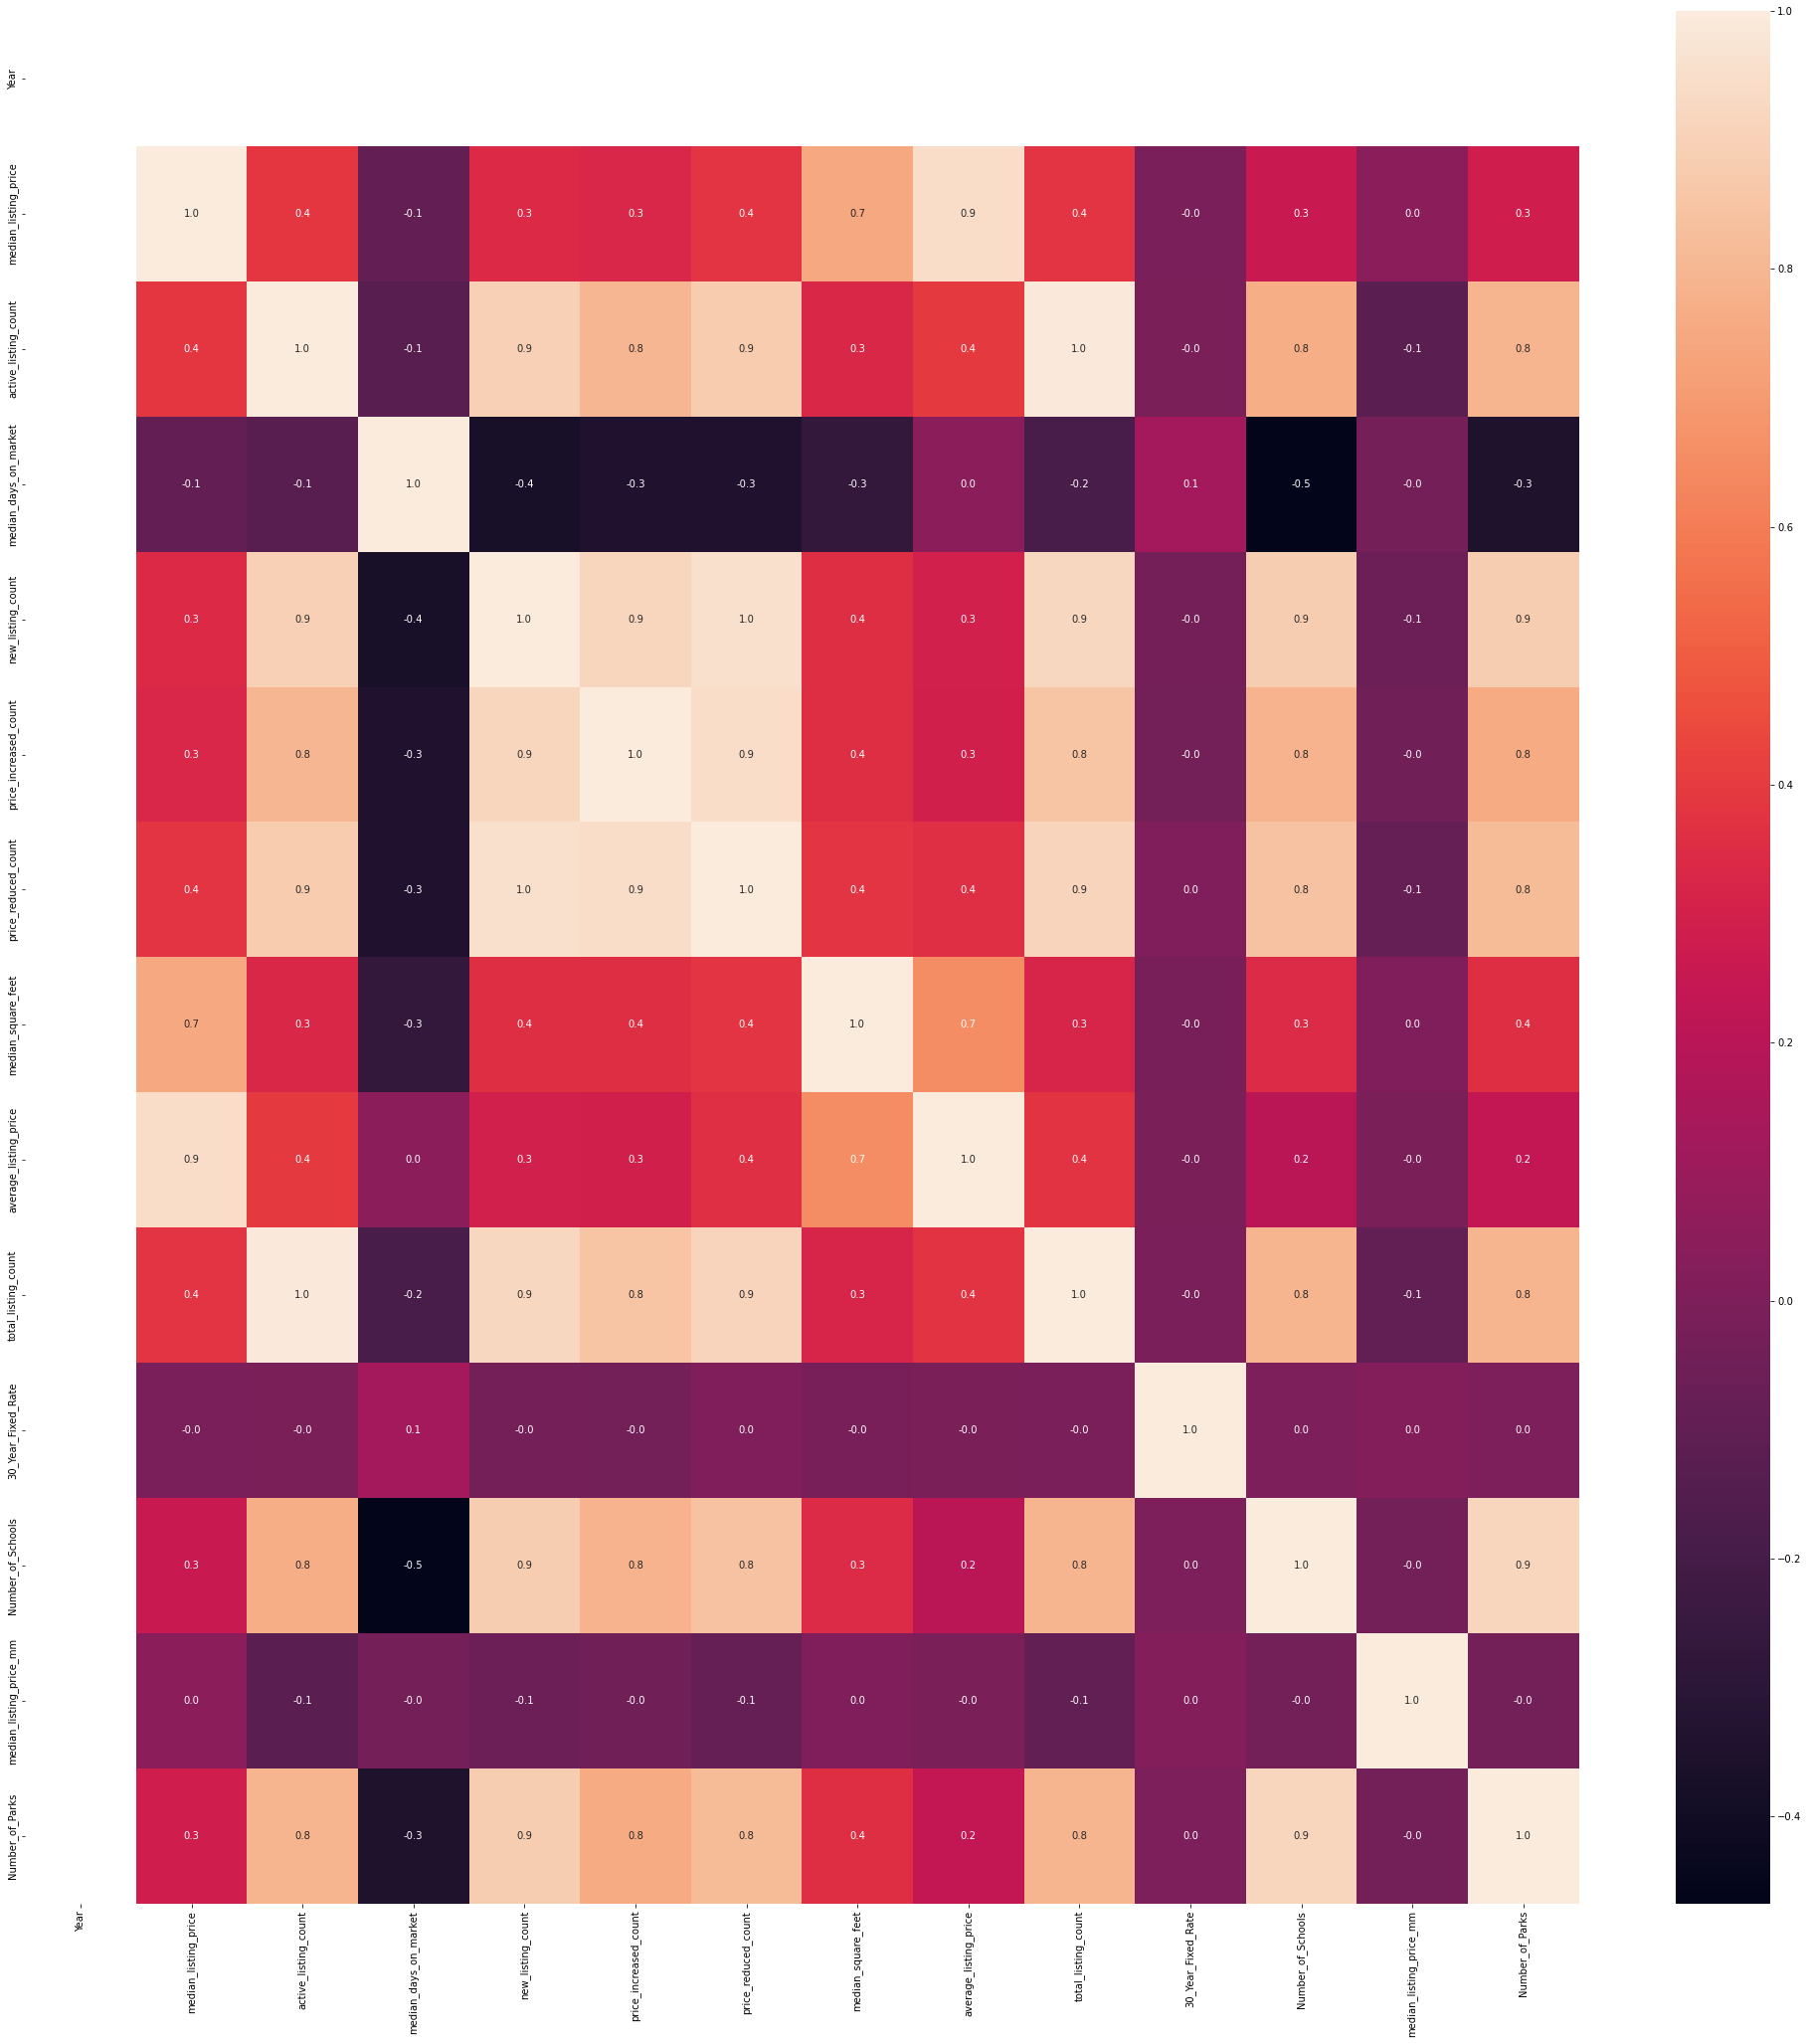

In [91]:
plt.rcParams['figure.figsize']=35,35
g = sns.heatmap(df.corr(),annot=True, fmt = ".1f")

<AxesSubplot:xlabel='median_listing_price', ylabel='Density'>

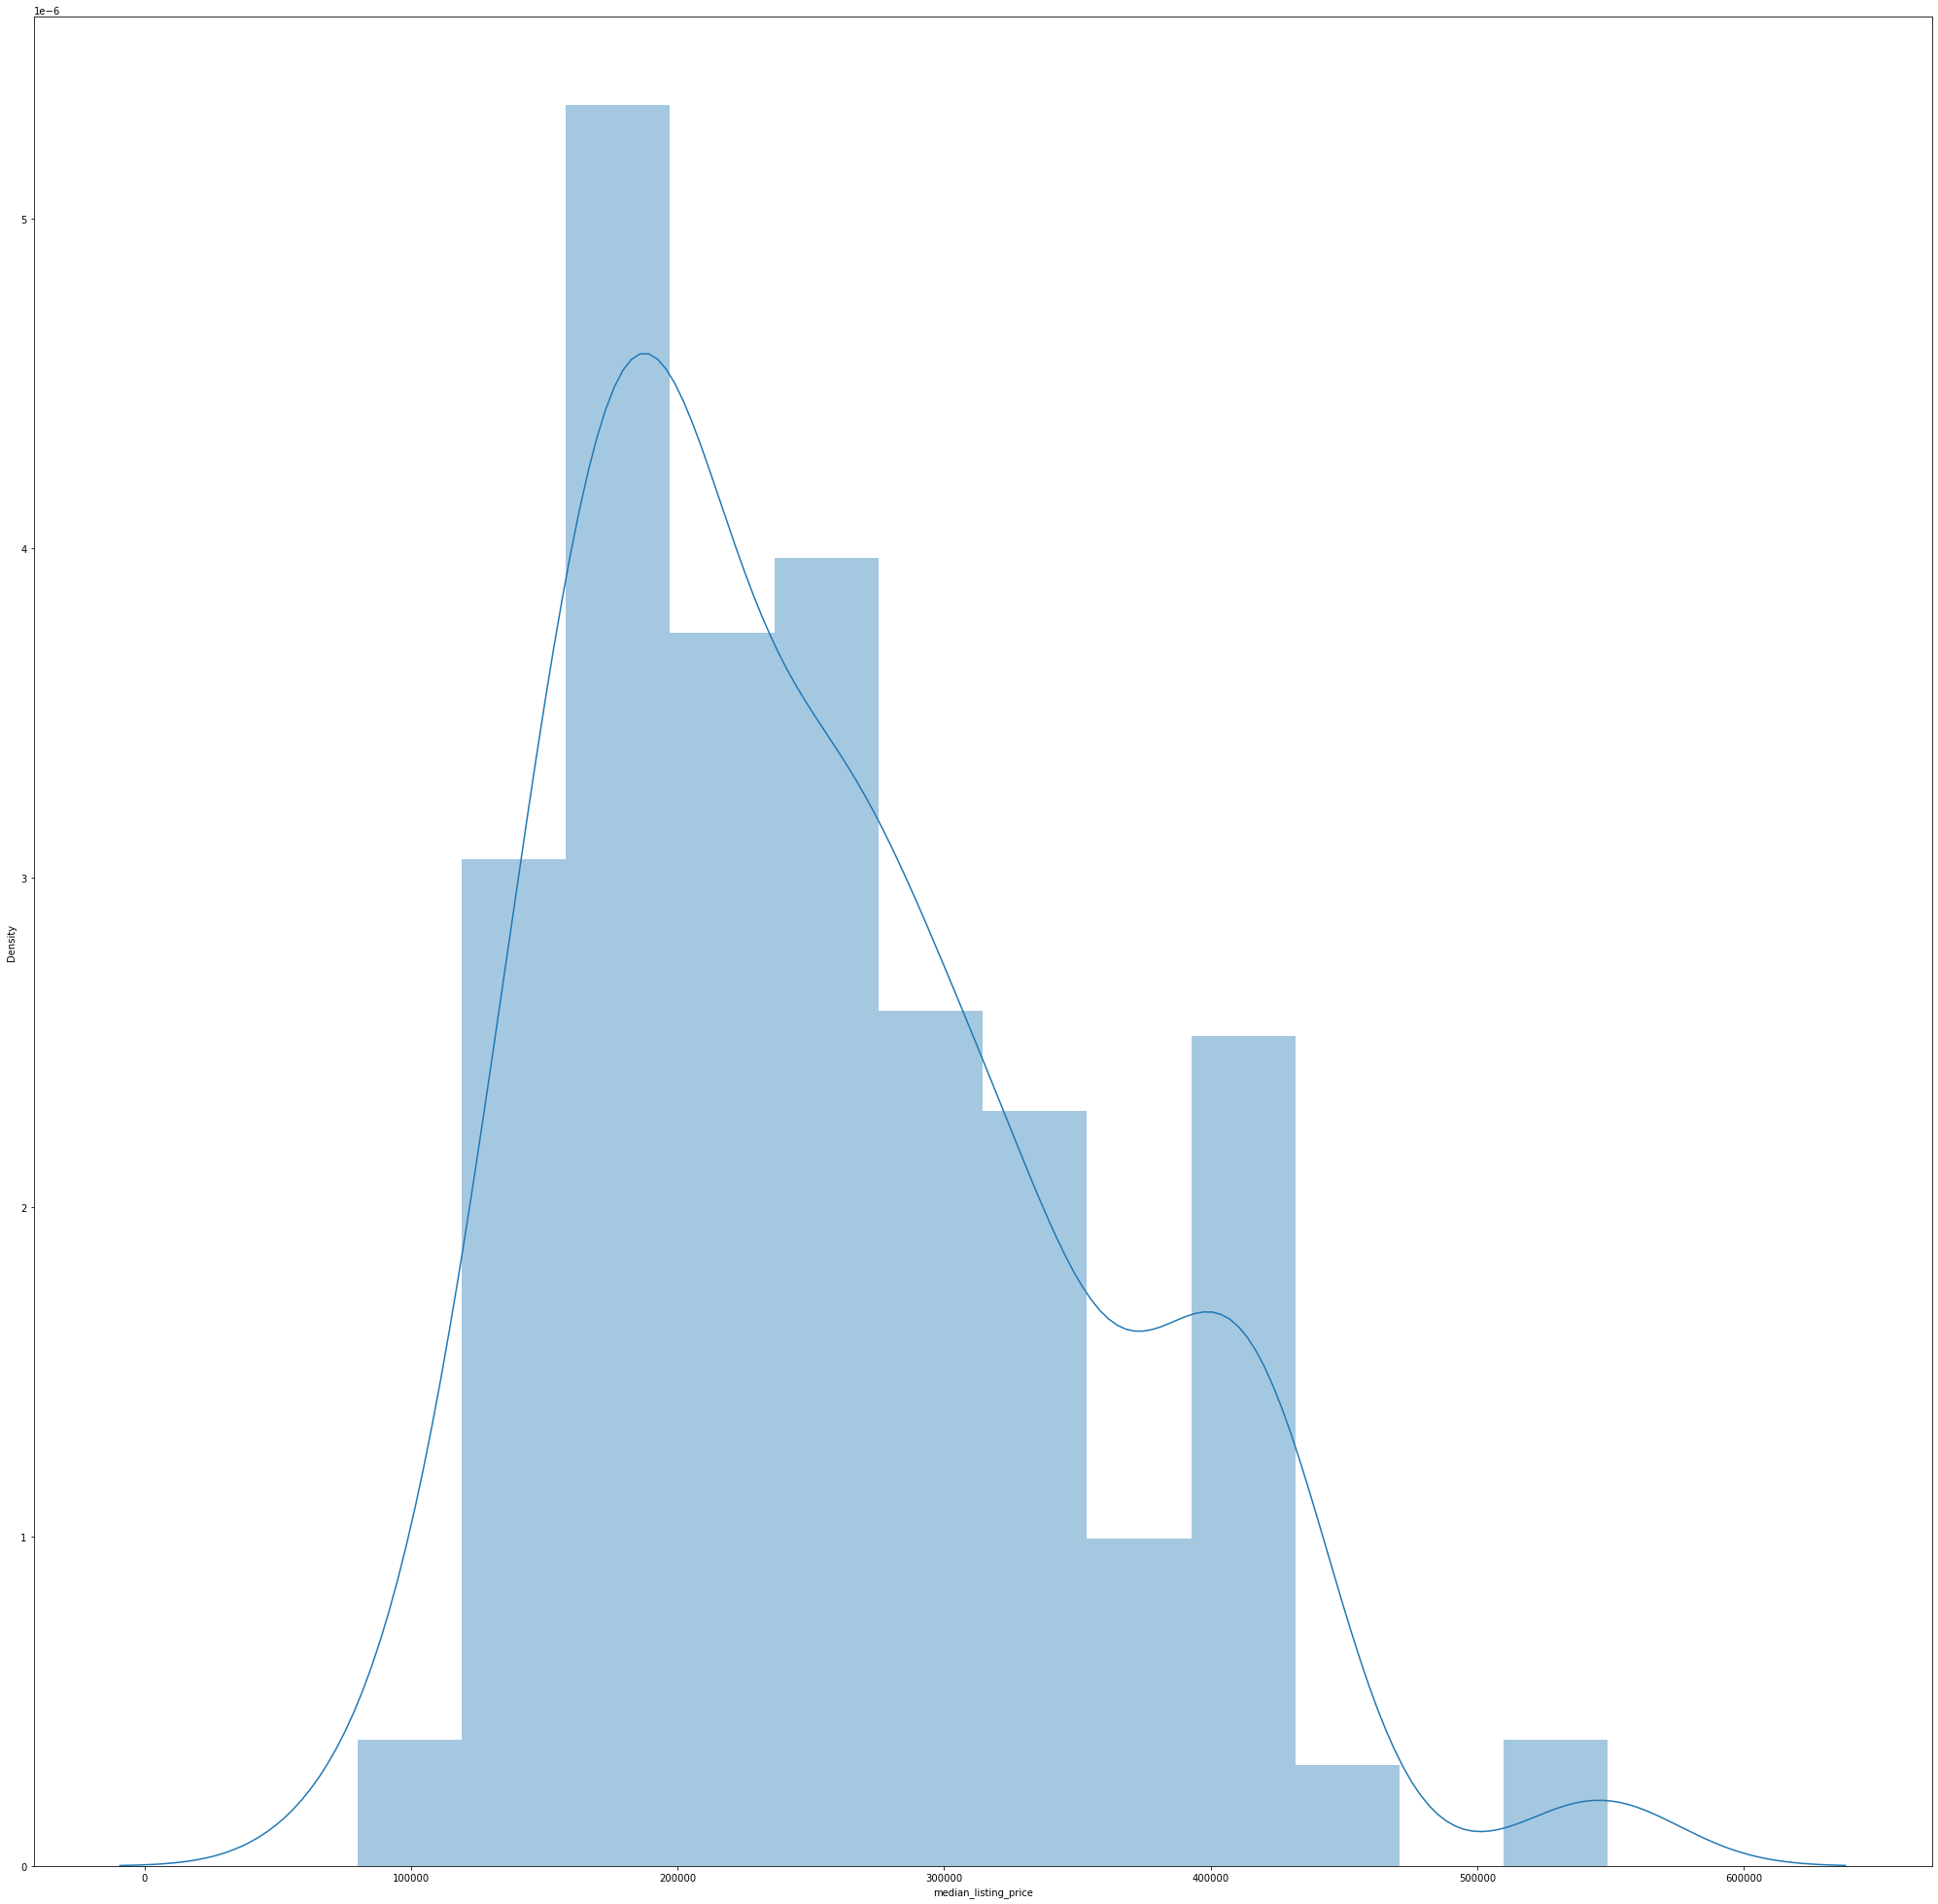

In [92]:
sns.distplot(df['median_listing_price'])

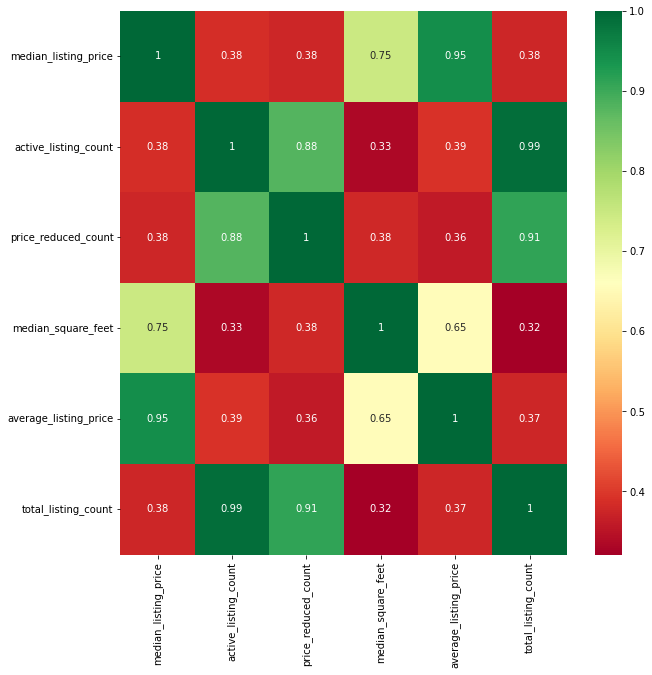

In [110]:
# Reference code:https://www.kaggle.com/code/bsivavenu/house-price-calculation-methods-for-beginners

# most correlated features
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["median_listing_price"])>0.35]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")